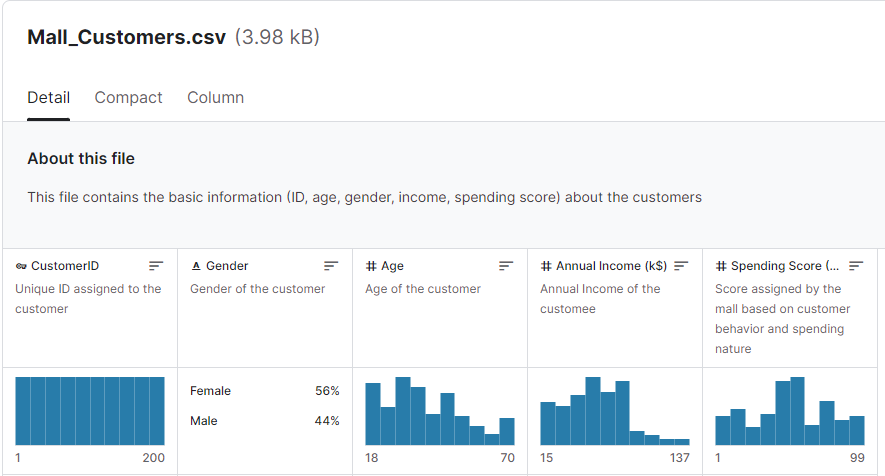

# Library Imports and Setup

In [20]:
# Install the mxnet library required for certain functionalities in SageMaker
%pip install mxnet
%pip install pandas
%pip install tarfile
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install tabulate
%pip install scikit-learn
%pip install openpyxl


# AWS SageMaker and Boto3
#import sagemaker
#from sagemaker import get_execution_role, KMeans
#from sagemaker.image_uris import retrieve
#from sagemaker.model import Model
#from sagemaker.predictor import Predictor
#from sagemaker.serializers import CSVSerializer
#import boto3
#from botocore.exceptions import ClientError

# Data Manipulation
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Additional Libraries
import tarfile
#import mxnet as mx
import datetime
import json
import time
from tabulate import tabulate
import numpy as np
import openpyxl
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

  Using cached mxnet-1.7.0.post2-py2.py3-none-win_amd64.whl (33.1 MB)
  Using cached numpy-1.16.6.zip (5.1 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached requests-2.18.4-py2.py3-none-any.whl (88 kB)
  Using cached graphviz-0.8.4-py2.py3-none-any.whl (16 kB)
  Using cached certifi-2025.1.31-py3-none-any.whl (166 kB)
Using legacy 'setup.py install' for numpy, since package 'wheel' is not installed.
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Running setup.py install for numpy: started
  Running setup.py install for numpy: finished with status 'error'
  Rolling back uninstall of numpy
  Moving to c:\users\anike\appdata\local\programs\python\python39\lib\site-packages\numpy-2.0.2-cp39-cp39-win_amd64.whl
   from C:\Users\anike\AppData\Local\Temp\pip-uninstall-1_cp9wfw\numpy-2.0.2-cp39-cp39-win_amd64.whl
  Moving t

  error: subprocess-exited-with-error
  
  × Running setup.py install for numpy did not run successfully.
  │ exit code: 1
  ╰─> [273 lines of output]
      Running from numpy source directory.
      
      Note: if you need reliable uninstall behavior, then install
      with pip instead of using `setup.py install`:
      
        - `pip install .`       (from a git repo or downloaded source
                                 release)
        - `pip install numpy`   (last NumPy release on PyPi)
      
      
      C:\Users\anike\AppData\Local\Temp\pip-install-dgwjv5ja\numpy_9554ec40c44a43479bcaa500902cf3fc\numpy\distutils\misc_util.py:476: SyntaxWarning: "is" with a literal. Did you mean "=="?
        return is_string(s) and ('*' in s or '?' is s)
      blas_opt_info:
      blas_mkl_info:
      No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
      customize MSVCCompiler
        libraries mkl_rt not found in ['c:\\Users\\anike\\AppData\\Local\\Pr

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\anike\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tarfile (from versions: none)
ERROR: No matching distribution found for tarfile
You should consider upgrading via the 'c:\Users\anike\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\anike\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\anike\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\anike\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\anike\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\Users\anike\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\anike\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


# Load and Preprocess the Dataset

In [21]:
# Step 1: Load the Dataset
# Load the mall customers dataset from a CSV file into a Pandas DataFrame.
# This allows for easy data manipulation and analysis.
df_socials = pd.read_excel('social_media_engagement_data.xlsx')

# Step 2: Encode Categorical Variables
# The 'Gender' column contains categorical data ('Male', 'Female') that we need to encode as numerical values for machine learning.
# We map 'Male' to 1 and 'Female' to 0.
df_socials['Audience Gender'] = df_socials['Audience Gender'].map({'Male': 1, 'Female': 0, 'Other':3})
df_copy = df_socials.copy()
df_copy.drop(['Platform', 'Post ID', 'Post Type', 'Post Content', 'Post Timestamp', 'Campaign ID', 'Influencer ID'], axis=1, inplace=True)
cat_cols = df_copy.select_dtypes(include=["object"]).columns
    
    # List to store DataFrames from one-hot encoding.

    

    # Iterate over each categorical column to apply the appropriate encoding.
for col in cat_cols:
        # One-hot encoding: create binary columns and drop the first category to avoid multicollinearity.
        df_copy[col] = df_copy[col].astype('category').cat.codes

    # Drop the original categorical columns since they are now encoded.
    
df_socials = df_copy
df_socials = df_socials.iloc[:500] # limiting it to the first 500 entries of the data set because having all 100000 rows stored in here will make it harder to visually distinguish clusters later



    
# Something has to be going wrong between these two lines of code, not sure where it's missing

# Step 3: Select Relevant Features
# For clustering, we focus on the features 'Gender', 'Age', 'Annual Income (k$)', and 'Spending Score (1-100)'.
# These features are selected and retained in the DataFrame for further processing.


# Step 4: Convert Data for Machine Learning
# Convert the selected DataFrame into a NumPy array of type 'float32'.
# This conversion is necessary as most machine learning frameworks work efficiently with NumPy arrays.
data_np = df_socials.values.astype('float32')

# Step 5: Save and Upload Preprocessed Data
# Save the preprocessed dataset to a CSV file, without the index.
# This file is then uploaded to an S3 bucket, making it accessible for machine learning tasks in SageMaker.
df_socials.to_csv('socials-all.csv', index=False)
#data_uri = sagemaker_session.upload_data('mall_data-all.csv', key_prefix=prefix)

# Output the S3 URI of the uploaded dataset for reference, confirming the successful upload.
#print(f"Data uploaded to S3: {data_uri}")

# Finally, display the first few rows of the processed dataset to verify the preprocessing steps.
print(df_socials.head())


   Likes  Comments  Shares  Impressions  Reach  Engagement Rate  Audience Age  \
0    415        77      85         2619   1842            31.32            29   
1    908       125      85         1223   3884            28.78            48   
2    412       419      58         2165    849           104.71            55   
3    667       153      29         7191   3519            24.13            54   
4    659       215      34         3312   2032            44.69            33   

   Audience Gender  Audience Location  Audience Interests  Sentiment  
0                3                229                 697          0  
1                1                 82                 629          1  
2                1                231                 379          1  
3                3                241                 714         -1  
4                3                  0                 925         -1  


# Create a 3D Scatter Plot

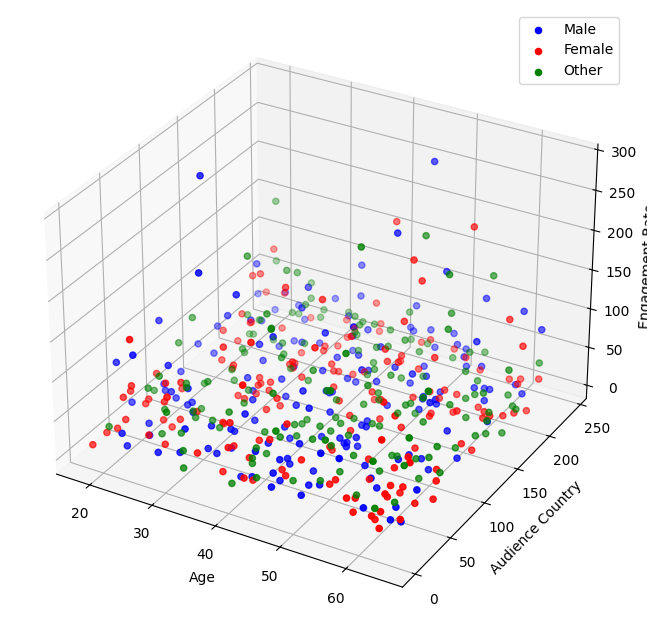

In [22]:
# Import the required libraries for data visualization
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Create a 3D scatter plot
# Initialize a figure with a specific size for the 3D scatter plot.
fig = plt.figure(figsize=(10, 8))

# Add a 3D subplot to the figure
# '111' indicates 1x1 grid, first subplot. 'projection='3d'' is used to create a 3D projection.
ax = fig.add_subplot(111, projection='3d')

# Step 2: Plot data points, colored by gender
# Scatter plot for male customers in blue
# Filters the DataFrame for male customers and plots their age, annual income, and spending score.
ax.scatter(df_socials[df_socials['Audience Gender'] == 1]['Audience Age'],
           df_socials[df_socials['Audience Gender'] == 1]['Audience Location'],
           df_socials[df_socials['Audience Gender'] == 1]['Engagement Rate'],
           c='blue', label='Male')

# Scatter plot for female customers in red
# Filters the DataFrame for female customers and plots their age, annual income, and spending score.
ax.scatter(df_socials[df_socials['Audience Gender'] == 0]['Audience Age'],
           df_socials[df_socials['Audience Gender'] == 0]['Audience Location'],
           df_socials[df_socials['Audience Gender'] == 0]['Engagement Rate'],
           c='red', label='Female')

ax.scatter(df_socials[df_socials['Audience Gender'] == 3]['Audience Age'],
           df_socials[df_socials['Audience Gender'] == 3]['Audience Location'],
           df_socials[df_socials['Audience Gender'] == 3]['Engagement Rate'],
           c='green', label='Other')

# Step 3: Set labels and legend
# Adding axis labels and a legend to make the plot more informative.
ax.set_xlabel('Age')
ax.set_ylabel('Audience Country')
ax.set_zlabel('Engagement Rate')
ax.legend()

# Display the plot
plt.show()

# SageMaker Setup and Configuration

In [2]:
# Initialize a SageMaker Session
# A SageMaker Session helps in managing the interactions with the AWS SageMaker service, such as creating and training models, and deploying endpoints.
sagemaker_session = sagemaker.Session()

# Retrieve the IAM role
# The IAM role is required by SageMaker to access AWS resources (e.g., S3 buckets) on your behalf.
role = get_execution_role()

# Identify the AWS Region of the SageMaker Session
# This information is used to ensure that resources are created in the same region as the SageMaker session.
region = sagemaker_session.boto_region_name

# Create Boto3 Clients for S3 and SageMaker
# These clients enable programmatic access to S3 and SageMaker services for operations like uploading data and creating training jobs.
s3_client = boto3.client('s3')
sagemaker_client = boto3.client('sagemaker')

# Retrieve the Docker image URI for the KMeans algorithm
# This URI is specific to the AWS region and is used to pull the appropriate image for training.
image_uri = retrieve('kmeans', region)

# Define the Default S3 Bucket for SageMaker
# SageMaker requires an S3 bucket to store training data, models, and outputs. Here, we use the session's default bucket.
bucket = sagemaker_session.default_bucket()

# Set the S3 Prefix for Storing Data
# The prefix is used to organize the data in the bucket, making it easier to manage and locate.
prefix = 'sagemaker/mall/kmeans-all'

# Output the IAM Role ARN and AWS Region for verification
print("Execution Role ARN:", role)
print("AWS Region:", region)

Execution Role ARN: arn:aws:iam::381492163284:role/LabRole
AWS Region: us-east-1


# KMeans Model Training

In [6]:
# Define the range of k values for the KMeans clustering
# This range will determine how many models we train, each with a different number of clusters.
k_values = range(2, 8)

# Initialize lists to keep track of the S3 paths for the trained models and their training job names.
model_paths = []
training_jobs = []

# Set the output path in the S3 bucket for the trained models
# This path will be used to store the output (model artifacts) of each training job.
output_path = f's3://{sagemaker_session.default_bucket()}/sagemaker/mall/kmeans-all/output'

# Iterate over each k value to train a separate KMeans model for that number of clusters
for k in k_values:
    # Generate a unique job name for each training job based on the k value
    job_name = f'kmeans-mall-all-k-{k}'
    
    # Initialize the KMeans estimator from SageMaker with the specific k value
    # Configuration includes instance type, number of instances, and the specified k value.
    kmeans = KMeans(
        sagemaker_session=sagemaker_session,
        role=role,
        instance_count=1,
        instance_type='ml.m5.large',
        k=k,
        output_path=output_path,
        job_name=job_name,
        feature_dim=4  # Specify the number of features in the input data
    )
    
    # Start the training job for the KMeans model
    # We use 'wait=False' to start each training job asynchronously.
    kmeans.fit(kmeans.record_set(data_np), wait=False)
    training_jobs.append((k, kmeans.latest_training_job.name))

# After initiating all training jobs, we wait for each to complete and collect their model URIs
for k, job_name in training_jobs:
    # Wait for the completion of the training job
    sagemaker_client.get_waiter('training_job_completed_or_stopped').wait(TrainingJobName=job_name)
    
    # Retrieve the S3 URI of the model artifacts for the completed training job
    training_job_description = sagemaker_client.describe_training_job(TrainingJobName=job_name)
    model_s3_uri = training_job_description['ModelArtifacts']['S3ModelArtifacts']
    model_paths.append((k, model_s3_uri))

# Print the S3 paths of the model artifacts for all trained models
# This provides a clear reference to the location of each model for further analysis or deployment.
headers = ['k Value', 'S3 Model Artifact Path']
print(tabulate(model_paths, headers=headers))

INFO:sagemaker.image_uris:Same images used for training and inference. Defaulting to image scope: inference.
INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.
INFO:sagemaker:Creating training-job with name: kmeans-2024-03-17-18-12-30-919
INFO:sagemaker.image_uris:Same images used for training and inference. Defaulting to image scope: inference.
INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.
INFO:sagemaker.image_uris:Same images used for training and inference. Defaulting to image scope: inference.
INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.
INFO:sagemaker:Creating training-job with name: kmeans-2024-03-17-18-12-31-458
INFO:sagemaker.image_uris:Same images used for training and inference. Defaulting to image scope: inference.
INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.
INFO:sagemaker.image_uris:Same images used for training and inference. Defaulting to image scope: inference.
INFO:sagemaker.image_uris

  k Value  S3 Model Artifact Path
---------  -------------------------------------------------------------------------------------------------------------------------
        2  s3://sagemaker-us-east-1-381492163284/sagemaker/mall/kmeans-all/output/kmeans-2024-03-17-18-12-30-919/output/model.tar.gz
        3  s3://sagemaker-us-east-1-381492163284/sagemaker/mall/kmeans-all/output/kmeans-2024-03-17-18-12-31-458/output/model.tar.gz
        4  s3://sagemaker-us-east-1-381492163284/sagemaker/mall/kmeans-all/output/kmeans-2024-03-17-18-12-33-359/output/model.tar.gz
        5  s3://sagemaker-us-east-1-381492163284/sagemaker/mall/kmeans-all/output/kmeans-2024-03-17-18-12-34-127/output/model.tar.gz
        6  s3://sagemaker-us-east-1-381492163284/sagemaker/mall/kmeans-all/output/kmeans-2024-03-17-18-12-35-480/output/model.tar.gz
        7  s3://sagemaker-us-east-1-381492163284/sagemaker/mall/kmeans-all/output/kmeans-2024-03-17-18-12-35-928/output/model.tar.gz


# Determine K through Elbow Plot

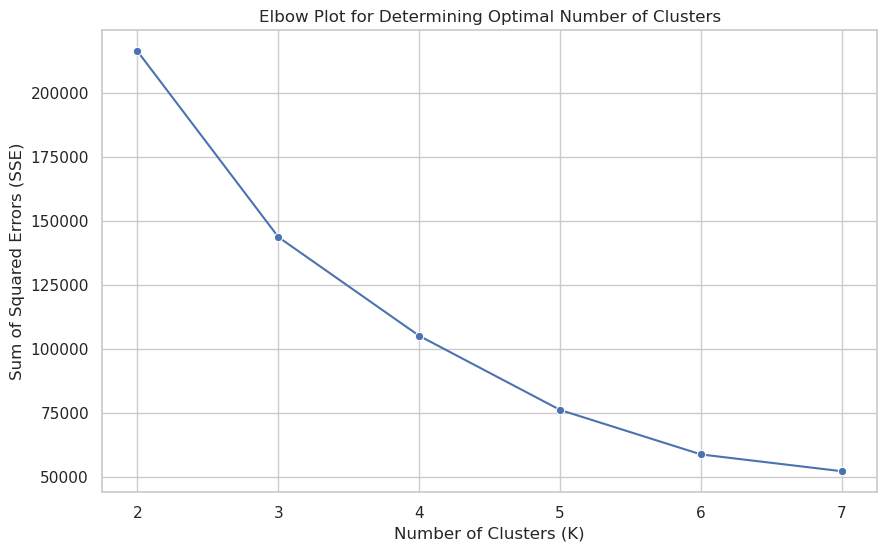

In [7]:
# List to store the Sum of Squared Errors (SSE) for each value of K
sse_values = []

# Iterate over each trained model's path to calculate SSE
for k, model_path in model_paths:
    try:
        # Download the model artifacts from S3
        local_path = f'/tmp/model-k-{k}.tar.gz'
        s3_client.download_file(sagemaker_session.default_bucket(), model_path.replace(f's3://{sagemaker_session.default_bucket()}/', ''), local_path)
        
        # Extract the model artifacts
        with tarfile.open(local_path) as tar:
            tar.extractall(path=f'/tmp/k-{k}')
        
        # Load the KMeans model parameters
        kmeans_model_params = mx.ndarray.load(f'/tmp/k-{k}/model_algo-1')
        centroids = kmeans_model_params[0].asnumpy()
        
        # Calculate distances from each point to each centroid
        distances = np.sqrt(((data_np - centroids[:, np.newaxis])**2).sum(axis=2))
        
        # Determine the closest centroid for each data point
        closest_centroids = np.argmin(distances, axis=0)
        
        # Calculate SSE for this value of K
        sse = np.sum((data_np - centroids[closest_centroids])**2)
        sse_values.append(sse)
    except Exception as e:
        print(f'Error processing model for K={k}: {e}')

# Create and display the Elbow Plot using seaborn and matplotlib
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x=[k for k, _ in model_paths], y=sse_values, marker='o')
plt.title('Elbow Plot for Determining Optimal Number of Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks([k for k, _ in model_paths])
plt.show()

# Determine K through using Silhouette Method

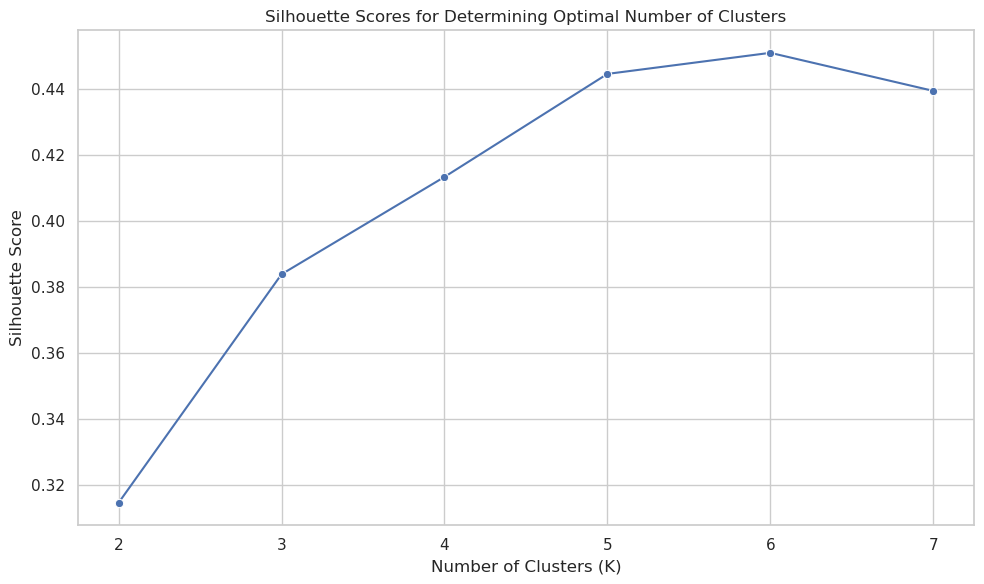

In [8]:
# List to store the silhouette scores for each value of K
silhouette_scores = []

# Iterate over each trained model's path to calculate its silhouette score
for k, model_path in model_paths:
    try:
        # Download the model artifacts from S3
        local_path = f'/tmp/model-k-{k}.tar.gz'
        s3_client.download_file(sagemaker_session.default_bucket(), model_path.replace(f's3://{sagemaker_session.default_bucket()}/', ''), local_path)
        
        # Extract the model artifacts
        with tarfile.open(local_path) as tar:
            tar.extractall(path=f'/tmp/k-{k}')
        
        # Load the KMeans model parameters
        kmeans_model_params = mx.ndarray.load(f'/tmp/k-{k}/model_algo-1')
        centroids = kmeans_model_params[0].asnumpy()
        
        # Calculate distances from each point to each centroid
        distances = np.sqrt(((data_np - centroids[:, np.newaxis])**2).sum(axis=2))
        
        # Determine the closest centroid for each data point
        closest_centroids = np.argmin(distances, axis=0)
        
        # Calculate the silhouette score for this value of K
        silhouette_score_value = silhouette_score(data_np, closest_centroids)
        silhouette_scores.append(silhouette_score_value)
    except Exception as e:
        print(f'Error processing model for K={k}: {e}')

# Plot the silhouette scores for different values of K, if available
if silhouette_scores:  # Ensure the list is not empty
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=[k for k, _ in model_paths], y=silhouette_scores, marker='o')
    plt.title('Silhouette Scores for Determining Optimal Number of Clusters')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Silhouette Score')
    plt.tight_layout()  # Adjust the layout to make sure everything fits without overlap
    plt.show()
else:
    print("No silhouette scores to plot.")


# Visualize the centroids for the optimal K value and display the cluster assignments for each datapoint

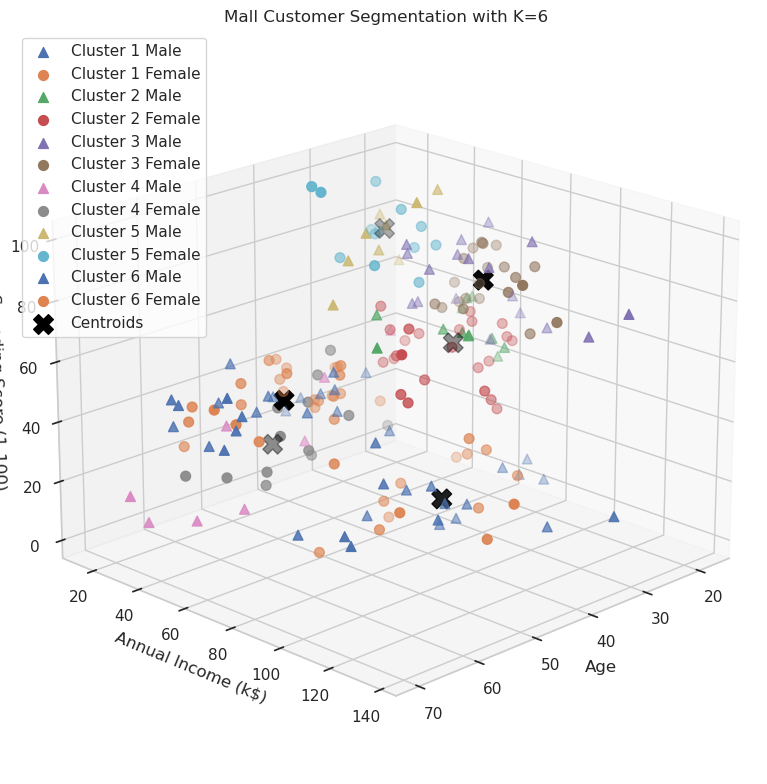

In [9]:
# Specify the optimal number of clusters determined previously
best_k = 6

# Retrieve the model path for the best K value from the list of trained models
best_model_path = next(path for k, path in model_paths if k == best_k)

# Download the best model artifacts from S3
local_path = f'/tmp/model-k-{best_k}.tar.gz'
s3_client.download_file(bucket, best_model_path.replace(f's3://{bucket}/', ''), local_path)

# Extract the model artifacts
with tarfile.open(local_path) as tar:
    tar.extractall(path=f'/tmp/k-{best_k}')

# Load the KMeans model parameters from the extracted files
kmeans_model_params = mx.ndarray.load(f'/tmp/k-{best_k}/model_algo-1')
centroids = kmeans_model_params[0].asnumpy()

# Calculate distances from each point to the centroids and determine closest centroid for each point
distances = np.sqrt(((data_np - centroids[:, np.newaxis])**2).sum(axis=2))
closest_centroids = np.argmin(distances, axis=0)

# Initialize a 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot data points, color-coded by cluster assignment and gender
for i in range(best_k):
    cluster_points = data_np[closest_centroids == i]
    male_points = cluster_points[cluster_points[:, 0] == 1]  # Filter male points
    female_points = cluster_points[cluster_points[:, 0] == 0]  # Filter female points
    ax.scatter(male_points[:, 1], male_points[:, 2], male_points[:, 3], s=50, label=f'Cluster {i+1} Male', marker='^')
    ax.scatter(female_points[:, 1], female_points[:, 2], female_points[:, 3], s=50, label=f'Cluster {i+1} Female', marker='o')

# Plot centroids
ax.scatter(centroids[:, 1], centroids[:, 2], centroids[:, 3], s=200, c='black', marker='X', label='Centroids')

# Customize the view angle for better visualization
ax.view_init(elev=20, azim=45)

# Set titles and labels
ax.set_title(f'Mall Customer Segmentation with K={best_k}')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.legend()

plt.tight_layout()
plt.show()


# Model Deployment to SageMaker Endpoint

In [10]:
# Specify names for the endpoint and its configuration
endpoint_name = 'mall-kmeans-all'
endpoint_config_name = 'mall-kmeans-all'

# Function to wait for endpoint configuration deletion
def wait_for_endpoint_config_deletion(endpoint_config_name):
    print(f'Waiting for endpoint configuration "{endpoint_config_name}" to be deleted...')
    while True:
        try:
            sagemaker_client.describe_endpoint_config(EndpointConfigName=endpoint_config_name)
            time.sleep(5)  # Poll every 5 seconds
        except ClientError as e:
            if e.response['Error']['Code'] == 'ValidationException':
                print(f'Endpoint configuration "{endpoint_config_name}" deleted.')
                break
            else:
                raise

# Check and delete the existing endpoint configuration if it exists
try:
    sagemaker_client.describe_endpoint_config(EndpointConfigName=endpoint_config_name)
    print(f'Endpoint configuration "{endpoint_config_name}" already exists. Deleting...')
    sagemaker_client.delete_endpoint_config(EndpointConfigName=endpoint_config_name)
    wait_for_endpoint_config_deletion(endpoint_config_name)
except ClientError as e:
    if e.response['Error']['Code'] == 'ValidationException':
        print(f'Endpoint configuration "{endpoint_config_name}" does not exist.')

# Function to wait for endpoint deletion
def wait_for_endpoint_deletion(endpoint_name):
    print(f'Waiting for endpoint "{endpoint_name}" to be deleted...')
    while True:
        try:
            sagemaker_client.describe_endpoint(EndpointName=endpoint_name)
            time.sleep(5)  # Poll every 5 seconds
        except ClientError as e:
            if e.response['Error']['Code'] == 'ValidationException':
                print(f'Endpoint "{endpoint_name}" deleted.')
                break
            else:
                raise

# Check and delete the existing endpoint if it exists
try:
    sagemaker_client.describe_endpoint(EndpointName=endpoint_name)
    print(f'Endpoint "{endpoint_name}" already exists. Deleting...')
    sagemaker_client.delete_endpoint(EndpointName=endpoint_name)
    wait_for_endpoint_deletion(endpoint_name)
except ClientError as e:
    if e.response['Error']['Code'] == 'ValidationException':
        print(f'Endpoint "{endpoint_name}" does not exist.')

# Identify the best model based on prior analysis
best_k = 6  # Assuming best_k is determined through prior analysis
best_model_s3_uri = next(path for k, path in model_paths if k == best_k)

# Create a SageMaker Model object with the best model's artifacts
best_model = Model(
    model_data=best_model_s3_uri,
    image_uri=image_uri,
    role=role,
    sagemaker_session=sagemaker_session
)

# Deploy the model to an endpoint
# Note: This operation can take several minutes to complete.
predictor = best_model.deploy(
    endpoint_name=endpoint_name,
    initial_instance_count=1,
    instance_type='ml.m5.large'
)

print(f'Model deployed to endpoint: {endpoint_name}')

Endpoint configuration "mall-kmeans-all" already exists. Deleting...
Waiting for endpoint configuration "mall-kmeans-all" to be deleted...
Endpoint configuration "mall-kmeans-all" deleted.
Endpoint "mall-kmeans-all" already exists. Deleting...
Waiting for endpoint "mall-kmeans-all" to be deleted...


INFO:sagemaker:Creating model with name: kmeans-2024-03-17-18-19-43-015


Endpoint "mall-kmeans-all" deleted.


INFO:sagemaker:Creating endpoint-config with name mall-kmeans-all
INFO:sagemaker:Creating endpoint with name mall-kmeans-all


------!Model deployed to endpoint: mall-kmeans-all


# Cluster Associations and Centroids

In [11]:
# Initialize a Predictor object for the deployed SageMaker endpoint
predictor = Predictor(endpoint_name=endpoint_name, serializer=CSVSerializer())

def get_user_input(prompt):
    """Function to get user input; allows quitting by typing 'quit'."""
    user_input = input(prompt).strip()
    if user_input.lower() == 'quit':
        return None
    return user_input

def validate_and_prompt(feature_name, feature_prompt):
    """Validate and repeatedly prompt until a valid input or 'quit' is entered."""
    while True:
        user_input = get_user_input(feature_prompt)
        if user_input is None:  # User chose to exit
            return None
        try:
            # For gender, ensure it's 0 or 1; for other features, ensure they're positive numbers
            if feature_name == 'Gender':
                if user_input in ['0', '1']:
                    return user_input
                else:
                    print("Invalid input. Please enter 0 for Female or 1 for Male.")
            else:
                value = float(user_input)
                if value > 0:
                    return str(value)
                else:
                    print(f"Please enter a positive number for {feature_name}.")
        except ValueError:
            print(f"Invalid input. Please enter a number for {feature_name}.")

print("Cluster Prediction Program")
print("Enter the following information for a prediction, or type 'quit' to exit.")

while True:
    # Collect inputs from the user
    gender = validate_and_prompt('Gender', "Enter Gender (0 for Female, 1 for Male): ")
    if gender is None: break
    age = validate_and_prompt('Age', "Enter Age: ")
    if age is None: break
    annual_income = validate_and_prompt('Annual Income', "Enter Annual Income (k$): ")
    if annual_income is None: break
    spending_score = validate_and_prompt('Spending Score', "Enter Spending Score (1-100): ")
    if spending_score is None: break

    # Prepare the data for prediction
    data = f'{gender},{age},{annual_income},{spending_score}\n'

    # Make prediction
    try:
        response = predictor.predict(data)
        # Parse the prediction response
        response_json = json.loads(response)
        cluster = response_json['predictions'][0]['closest_cluster']
        distance = response_json['predictions'][0]['distance_to_cluster']
        # Print the cluster assignment
        print(f"The data point belongs to Cluster {int(cluster)} with a distance of {distance:.2f} to the cluster center.")
    except Exception as e:
        print(f"An error occurred during prediction: {str(e)}")

print("Program exited.")

Cluster Prediction Program
Enter the following information for a prediction, or type 'quit' to exit.


Enter Gender (0 for Female, 1 for Male):  1
Enter Age:  20
Enter Annual Income (k$):  20
Enter Spending Score (1-100):  35


The data point belongs to Cluster 3 with a distance of 30.10 to the cluster center.


Enter Gender (0 for Female, 1 for Male):  quit


Program exited.


# Delete the Endpoint and Endpoint Config

In [12]:
# Prompt for confirmation before proceeding with the deletion
confirmation = input("Are you sure you want to delete the endpoint and endpoint configuration? (yes/no): ")

if confirmation.lower() == 'yes':

    # Function to delete endpoint configuration
    def delete_endpoint_config(endpoint_config_name):
        try:
            sagemaker_client.describe_endpoint_config(EndpointConfigName=endpoint_config_name)
            print(f'Endpoint configuration "{endpoint_config_name}" exists. Deleting...')
            sagemaker_client.delete_endpoint_config(EndpointConfigName=endpoint_config_name)
            print(f'Endpoint configuration "{endpoint_config_name}" deleted successfully.')
        except ClientError as e:
            if e.response['Error']['Code'] == 'ValidationException':
                print(f'Endpoint configuration "{endpoint_config_name}" does not exist.')
            else:
                raise

    # Function to delete the endpoint
    def delete_endpoint(endpoint_name):
        try:
            sagemaker_client.describe_endpoint(EndpointName=endpoint_name)
            print(f'Endpoint "{endpoint_name}" exists. Deleting...')
            sagemaker_client.delete_endpoint(EndpointName=endpoint_name)
            print(f'Endpoint "{endpoint_name}" deleted successfully.')
        except ClientError as e:
            if e.response['Error']['Code'] == 'ValidationException':
                print(f'Endpoint "{endpoint_name}" does not exist.')
            else:
                raise

    # Delete the endpoint configuration
    delete_endpoint_config(endpoint_config_name)

    # Delete the endpoint
    delete_endpoint(endpoint_name)

else:
    print("Deletion cancelled. The endpoint and its configuration were not deleted.")

Are you sure you want to delete the endpoint and endpoint configuration? (yes/no):  yes


Endpoint configuration "mall-kmeans-all" exists. Deleting...
Endpoint configuration "mall-kmeans-all" deleted successfully.
Endpoint "mall-kmeans-all" exists. Deleting...
Endpoint "mall-kmeans-all" deleted successfully.
